## Collatz cycle notebook

In [3]:
"""
This notebook analyses hypothetical cycles in collatz sequences and their corresponding features.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
from fractions import Fraction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collatz import commons


# Helper functions
def _calculate_max_beta(k:int, max_iterations:int):
    """
    This function calculates the (hypothetical) maximum beta of a Collatz
    sequence for a specific k factor.
    :param k: The k factor.
    :param max_iterations: Maximum number of iterations.
    :return: The maximum beta
    """
    collatz = pd.Series(commons.odd_collatz_sequence(1, k, max_iterations))
    collatz = collatz[:-1]
    beta_i = 1 + 1/(k * collatz)
    beta = beta_i.product()
    return float(beta)


# Configuration
MAX_N = 20
K_FACTOR = 3
MAX_ITERATIONS = 300

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate data
n = pd.Series(range(1, MAX_N + 1))
alpha_cycle = (n * log2(K_FACTOR)).astype('int64') + 1

analysis_frame = pd.DataFrame({
    "n": n,
    "alpha_cycle": alpha_cycle
})

analysis_frame["beta_cycle"] = 2**(analysis_frame["alpha_cycle"] - (n * log2(K_FACTOR)))
analysis_frame["beta_cycle_frac"] = analysis_frame["beta_cycle"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

beta_max = _calculate_max_beta(K_FACTOR, MAX_ITERATIONS)
analysis_frame["beta_max"] = beta_max
analysis_frame["beta_possible"] = \
    analysis_frame["beta_cycle"].round(5) <= analysis_frame["beta_max"].round(5)

# Print results
print_frame = analysis_frame[[
    "n", "alpha_cycle", "beta_cycle", "beta_max",
    "beta_possible", "beta_cycle_frac",
]]

print_frame.columns = [
    "n","a_cycle", "b_cycle", "b_max",
    "b_possible", "b_frac"
]

print("K:", K_FACTOR,
      "\n")

print(print_frame.to_string(index=False), "\n")


K: 3 

  n  a_cycle   b_cycle     b_max  b_possible          b_frac
  1        2  1.333333  1.333333        True             4/3
  2        4  1.777778  1.333333       False            16/9
  3        5  1.185185  1.333333        True           32/27
  4        7  1.580247  1.333333       False          128/81
  5        8  1.053498  1.333333        True         256/243
  6       10  1.404664  1.333333       False        1024/729
  7       12  1.872885  1.333333       False       4096/2187
  8       13  1.248590  1.333333        True       8192/6561
  9       15  1.664787  1.333333       False     32768/19683
 10       16  1.109858  1.333333        True     65536/59049
 11       18  1.479811  1.333333       False   262144/177147
 12       20  1.973081  1.333333       False  1048576/531441
 13       21  1.315387  1.333333        True  1301277/989273
 14       23  1.753850  1.333333       False  1408713/803212
 15       24  1.169233  1.333333        True   469571/401606
 16       26  1.5

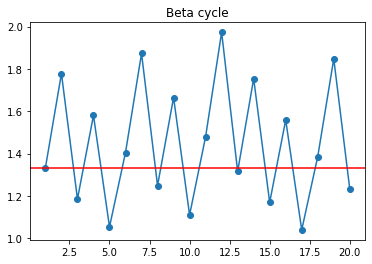

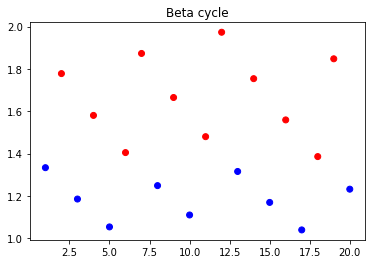

In [4]:
# Plot results
beta_colors = np.where(analysis_frame["beta_possible"] == True, 'b', 'r')

plt.figure()
plt.title("Beta cycle")
plt.plot(analysis_frame["n"], analysis_frame["beta_cycle"], "-o")
plt.axhline(beta_max, c="red")


plt.figure()
plt.title("Beta cycle")
plt.scatter(analysis_frame["n"], analysis_frame["beta_cycle"], c=beta_colors)

plt.show()